In [1]:
# Coursera IBM Course - Data Visualization with Python

# Lab 4

In [2]:
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays

In [3]:
# Read xlsx file - install xlrd module first

# Dataset from: https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp# 
df_can = pd.read_excel("Canada.xlsx",
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)

In [4]:
# Remove unnecessary columns
df_can.drop(['AREA','REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

# Rename columns
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns.values

# Convert columns into string
df_can.columns = list(map(str, df_can.columns))

# Adding a "Total" column that sums up the total immigrants by country

df_can["Total"]=df_can.sum(axis=1)

# Set "Country" as index 

df_can.set_index("Country", inplace=True)

# Create a list with "years" - useful for plotting
years = list(map(str, range(1980,2014)))

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualizing data

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for waffle

mpl.style.use(['ggplot'])

In [6]:
# Waffle Charts

In [7]:
df_dsn = df_can.loc[["Denmark", "Sweden", "Norway"], :]
df_dsn.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [10]:
# Proportion of each category with respect to total
total_values=sum(df_dsn["Total"])
category_proportions = [(float(value) / total_values) for value in df_dsn["Total"]]

# print out proportions

for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ": " + str(proportion))

Denmark: 0.32255663965602777
Sweden: 0.48503390110798744
Norway: 0.1924094592359848


In [11]:
# Define the overall size of the waffle chart

width = 40
height = 10

total_num_tiles = width * height # total number of tiles

print("Total number of tiles is ", total_num_tiles)

Total number of tiles is  400


In [12]:
# Use the proportion of each category to determine it respective number of tiles

tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out numbers of tiles in each category

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ": " + str(tiles))

Denmark: 129
Sweden: 194
Norway: 77


In [15]:
# Create a matrix that resembles the waffle chart and populates it:

# Code copied from the IBM lab -> need to be studied in details

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [16]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

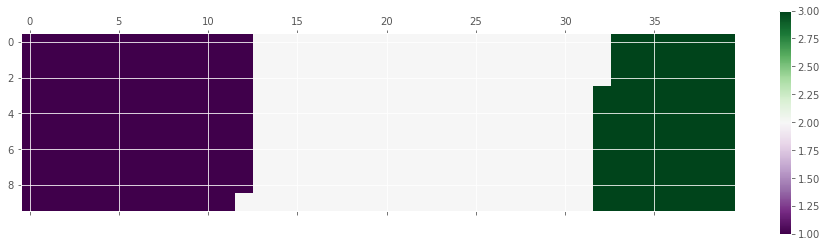

In [19]:
# Map the waffle chart matrix into a visual
fig=plt.figure()

# use mathshow to display the waffle chart

colormap = plt.cm.PRGn # choosing colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

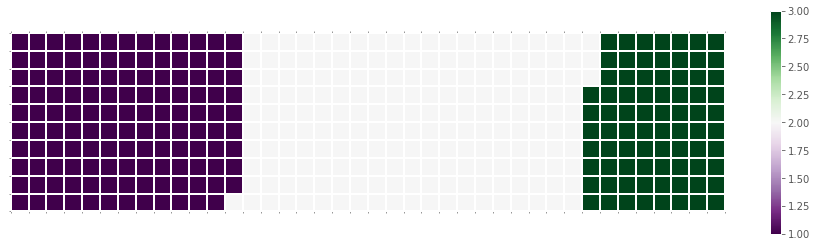

In [22]:
# Prettify the chart

# Map the waffle chart matrix into a visual
fig=plt.figure()

# use mathshow to display the waffle chart
colormap = plt.cm.PRGn # choosing colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca() # Get the current Axes instance on the current figure matching the given keyword args, or create one.

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

# turn off the ticks labels
plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

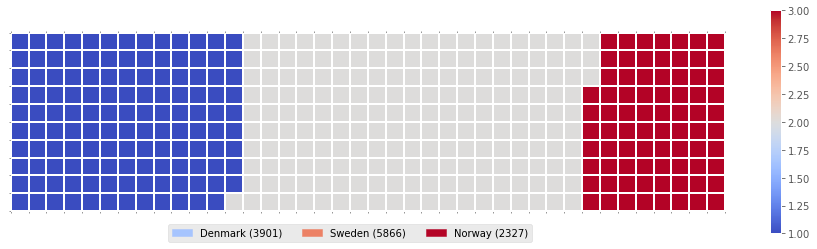

In [25]:
# Create a legend

# Map the waffle chart matrix into a visual
fig=plt.figure()

# use mathshow to display the waffle chart
colormap = plt.cm.coolwarm # choosing colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca() # Get the current Axes instance on the current figure matching the given keyword args, or create one.

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

# turn off the ticks labels
plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn["Total"])
total_values = values_cumsum[len(values_cumsum) - 1]

### This part also need to be studied in details

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [26]:
# Combine everything into one function:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Denmark: 129
Sweden: 194
Norway: 77


<Figure size 432x288 with 0 Axes>

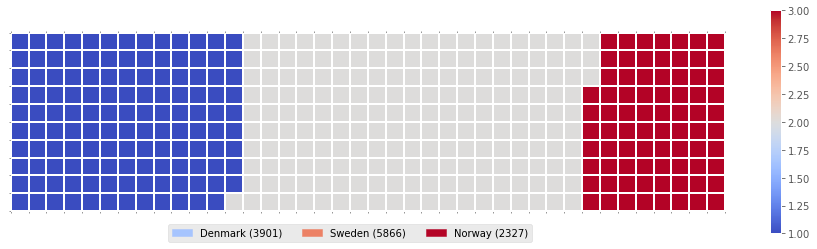

In [27]:
# Define function parameters:

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn["Total"] # correponding values of categories

colormap = plt.cm.coolwarm

# Call the function "create_waffle_chart"
create_waffle_chart(categories, values, height, width, colormap)


In [28]:
# Create waffle charts using PyWaffle

# Install: pip install pywaffle

import matplotlib.pyplot as plt
from pywaffle import Waffle

In [39]:
df_dsn2 = df_can.loc[["Denmark", "Sweden", "Norway"], ["Total"]]
df_dsn2.head()
df_dsn2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Denmark to Norway
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


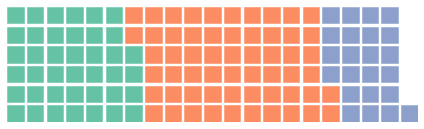

In [45]:
fig = plt.figure(
    FigureClass=Waffle,
    values=df_dsn2["Total"]/100,
    rows = 6,
    legend ={"loc": "upper left", "bbox_to_anchor": (1.1, 1)})
plt.show()